<a href="https://colab.research.google.com/github/lauren1turner/DS4002_LAM/blob/main/prelim_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TF-IDF matrix shape: (25, 82)
Top 10 features by average TF-IDF score: ['yeah', 'like', 'chorus', 'oh', 'know', 'la', 'uh', 've', 'just', 'verse']

Documents per cluster:
cluster
1    10
2    10
0     5
Name: count, dtype: int64


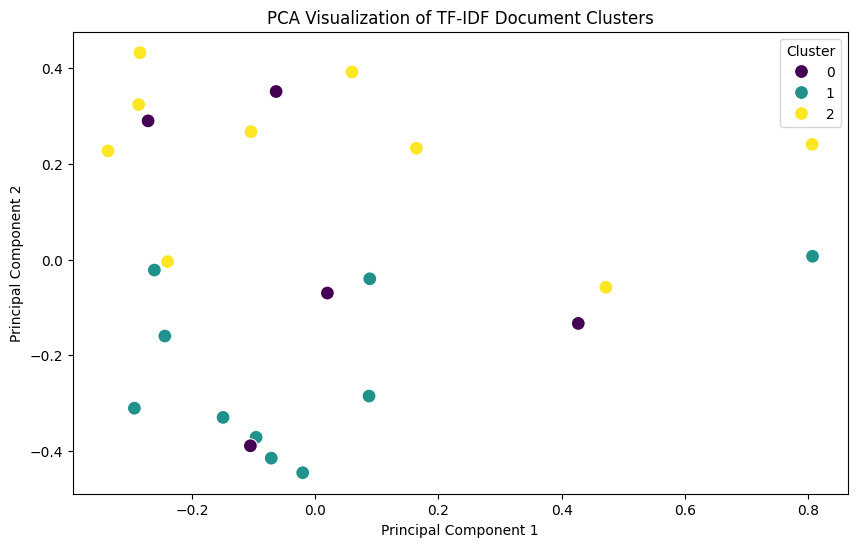

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CSV file
df = pd.read_csv('DC_clean.csv')

# Ensure the text data is treated as strings (adjust the column name if necessary)
documents = df['Lyrics'].astype(str)

# 2. Apply TfidfVectorizer to the text data
# You can adjust parameters such as stop_words, max_df, and min_df based on your needs.
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)
tfidf_matrix = vectorizer.fit_transform(documents)
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# 3. Analysis Part 1: Identify Top Features by Average TF-IDF Score
# Calculate the average TF-IDF score for each term across all documents
mean_tfidf = tfidf_matrix.mean(axis=0).A1  # .A1 converts to a 1D NumPy array
# Get indices of top 10 features (words)
top_indices = np.argsort(mean_tfidf)[::-1][:10]
top_features = [vectorizer.get_feature_names_out()[i] for i in top_indices]
print("Top 10 features by average TF-IDF score:", top_features)

# 4. Analysis Part 2: Cluster the Documents Using K-Means
num_clusters = 3  # Change the number of clusters as appropriate
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
clusters = kmeans.labels_
# Add the cluster labels to the DataFrame for further inspection if needed
df['cluster'] = clusters
print("\nDocuments per cluster:")
print(df['cluster'].value_counts())

# 5. Analysis Part 3: Visualize the Clusters using PCA
# Reduce the TF-IDF matrix to 2 dimensions for visualization.
# (Note: Converting the sparse matrix to a dense array might be heavy for large datasets.)
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Create a scatter plot of the PCA-reduced data with cluster coloring
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1],
                hue=clusters, palette="viridis", s=100, legend='full')
plt.title("PCA Visualization of TF-IDF Document Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

